<a href="https://colab.research.google.com/github/Mr-Premanand/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

# <b> Problem Description </b>

## **This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.**

 The names and usernames have been given codes to avoid any privacy concerns.

### **You are given the following information:**
1. Location = location (country) from where tweet is posted
2. Tweet At = Date on which tweet is posted
3. Original Tweet = Blog of tweet
4. Label = Type of sentiments ('Neutral', 'Positive', 'Extremely Negative', 'Negative','Extremely Positive')

## **Data Science Problem Statement**
### **Sentiment Analysis is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer’s attitude towards a particular topic is Positive, Negative, or Neutral.**

## **Individual Project**

### * **Premanand Gaikwad**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Pre_processing labraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split, KFold

# classification Ml models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.metrics import classification_report,confusion_matrix




In [3]:
df= pd.read_csv('/content/drive/MyDrive/Coronavirus Tweet Sentiment Analysis - Premanand Gaikwad/Coronavirus Tweets.csv',encoding= 'ISO-8859-1')

## **Data Overview**

In [4]:
#  View first 5 records
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
# view last 5 records
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [6]:
# Shape of the dataframe
df.shape

(41157, 6)

In [7]:
# Getting all the features of dataset
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

we have 41157 tweets with 6 features

In [8]:
# view some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [9]:
# checking the number of null count
df.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In data 8590 location of the tweets are missed.

In [10]:
#check duplicate entity in Dataframe
len(df[df.duplicated()])

0

In [11]:
#description of the dataset to get insights of the data
df.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


In [12]:
# Checking out the unique values
df.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

In [13]:
# checking the unique sentiments
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

This tweet data is recorded within the last 30 days and the number of the tweets is 41157, and the features are 6, from which 'Sentiment' is our target variable, i.e. dependent variable, and the others are independent variables, but as feature 'Location' has 8590 records missing, we will not include it. Basically, we need only the 'OriginalTweet' fatures to classify the sentiment. 

---
# **Exploratory Data Analysis (EDA) and Pre-processing**
---

### **Percentage wise sentiments**

In [14]:
#make a copy
df_copy=df.copy()

In [15]:
# let's take the number of sentiments with respect to the sentiments type
sentiments=df_copy["Sentiment"].value_counts()
sentiments

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff487eb3a50>],
      dtype=object)

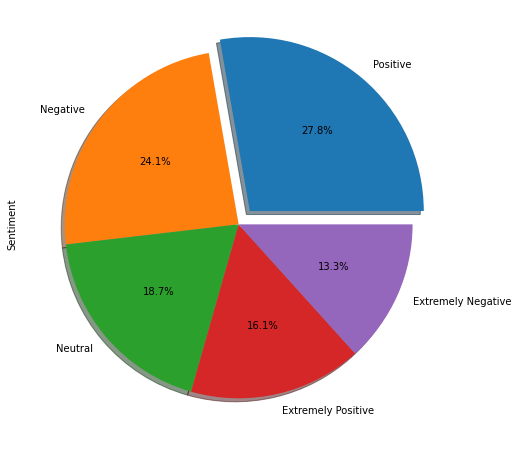

In [16]:
#plot the pie chart for sentiments
sentiments.plot.pie(subplots=True,figsize=(16,8),explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)

It is seen that most of the tweets are positive, means people have positive attitute in pandemic conditions

### **Top 10 highest number of tweet days**

In [17]:
#top 10 days on which twets are hghers
dates= df_copy['TweetAt'].value_counts().head(10)
dates

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
Name: TweetAt, dtype: int64

Text(0, 0.5, 'No. of Tweets')

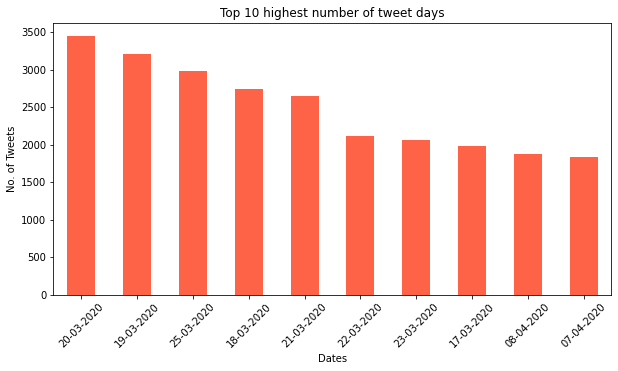

In [18]:
dates.plot(kind='bar',figsize=(10,5),color="tomato")
plt.title("Top 10 highest number of tweet days")
plt.xlabel('Dates')
plt.xticks(rotation=45)
plt.ylabel('No. of Tweets')

There are highest number of tweets in march month 

### **Based on the tweets top 10 locations.**

In [19]:
top_location=df_copy['Location'].value_counts().head(10)
top_location

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

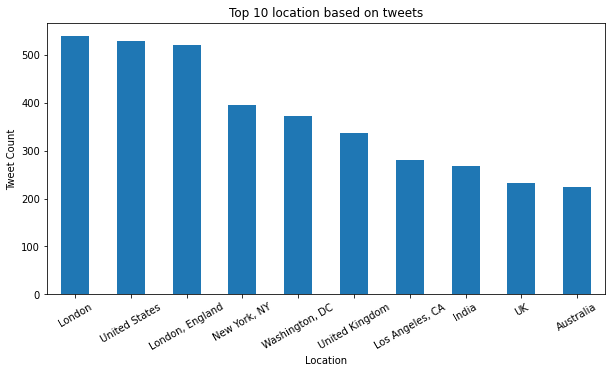

In [20]:
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
top_location.plot(ax = ax, kind='bar')
ax.set_title('Top 10 location based on tweets')
ax.set_xlabel('Location')
plt.xticks(rotation=30)
ax.set_ylabel('Tweet Count')
plt.show()

Highest number of tweets are from London and then US.

## **Text Pre-processing**
Text preprocessing is an approach for cleaning and preparing text data for use in a specific context.

### **Remove the Url address (https://)**

In [21]:
# Import Regular Expression (re)
import re     

# regex sub() function that returns a string after replacing the matched pattern in a string with a replacement
df_copy['OriginalTweet'] = df_copy['OriginalTweet'].apply(lambda x: re.sub('https?://[A-Za-z0-9./]+',' ', str(x)))

In [22]:
# Tweet before removing Url
df.OriginalTweet[2]

'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P'

In [23]:
# Tweet after removing Url
df_copy.OriginalTweet[2]

'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak  '

### **Reemove the Username ( @Xyz )**

In [24]:
# regex sub() function that returns a string after replacing the matched pattern in a string with a replacement
df_copy['OriginalTweet'] = df_copy['OriginalTweet'].apply(lambda x: re.sub('@[\w]*',' ', str(x)))

In [25]:
# Tweet before removing Username
df.OriginalTweet[5]

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU'

In [26]:
# Tweet after removing Username
df_copy.OriginalTweet[5]

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods,   reports  '

### **Remove the Special characters/Punctuations/Numbers**

In [27]:
df_copy['OriginalTweet'] = df_copy['OriginalTweet'].apply(lambda x: re.sub('[^a-zA-Z]',' ', str(x)))

In [28]:
# Tweet after removing numbers/punctuations/special characters
df_copy.OriginalTweet[5]

'As news of the region  s first confirmed COVID    case came out of Sullivan County last week  people flocked to area stores to purchase cleaning supplies  hand sanitizer  food  toilet paper and other goods    reports  '

### **Remove the Stopword and tokenize**
Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

In [29]:
# get the stop words
nltk.download('stopwords')
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
#Function to remove stopwords
def stopwords(text):
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return (text)

In [31]:
df_copy['OriginalTweet']= df_copy['OriginalTweet'].apply(lambda x: stopwords(x))

In [32]:
df_copy.OriginalTweet[2]

['coronavirus',
 'australia',
 'woolworths',
 'give',
 'elderly',
 'disabled',
 'dedicated',
 'shopping',
 'hours',
 'amid',
 'covid',
 'outbreak']

### **Remove the shorts words**

In [33]:
#Removing words with than 3 letters
df_copy['OriginalTweet'] = df_copy['OriginalTweet'].apply(lambda x: (w for w in x if len(w)>3))

### **Stemming**
Stemming is a technique used to extract the base form of the words by removing suffixes from them. It is just like cutting down the branches of a tree to its stems. For example, the stem of the words eating, eats, eaten is eat.

In [34]:
# Import the stemmer
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [35]:
#function which stems each word in the given text'''
def stemming(text):    
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text)) 

In [36]:
df_copy['OriginalTweet'] = df_copy['OriginalTweet'].apply(lambda x: stemming(x))

In [37]:
#result
df_copy.OriginalTweet[5]

'news region first confirm covid case came sullivan counti last week peopl flock area store purchas clean suppli hand sanit food toilet paper good report'

### **Encode the Sentimentals**

In [38]:
#function to encode 

def encode(sentiment):
    if sentiment=='Neutral':                                                     # give 0 to the neutral
        return 0

    elif (sentiment=='Positive') or  (sentiment=='Extremely Positive'):          # By combining positive and extreamely positive give 1
        return 1          

    else:
        return -1                                                                # by combining negative and extreamely negative give -1   


In [39]:
#apply
df_copy['Sentiment'] = df_copy['Sentiment'].apply(encode)
df_copy.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,,0
1,3800,48752,UK,16-03-2020,advic talk neighbour famili exchang phone numb...,1
2,3801,48753,Vagabonds,16-03-2020,coronaviru australia woolworth give elderli di...,1
3,3802,48754,NaN,16-03-2020,food stock empti pleas panic enough food every...,1
4,3803,48755,NaN,16-03-2020,readi supermarket covid outbreak paranoid food...,-1


Text(0.5, 1.0, 'No. of Sentiments after encoding')

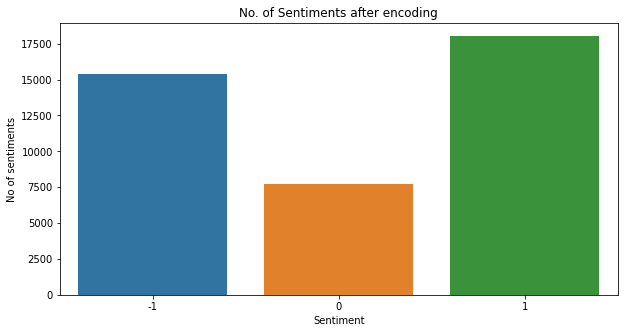

In [40]:
# plot the results
plt.figure(figsize=(10,5))
sns.countplot('Sentiment', data=df_copy)
plt.ylabel('No of sentiments')
plt.title("No. of Sentiments after encoding")

### **Visualize the word of sentiments**

In [41]:
#Import the library
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

**Word Cloud for Negative Sentiments word**

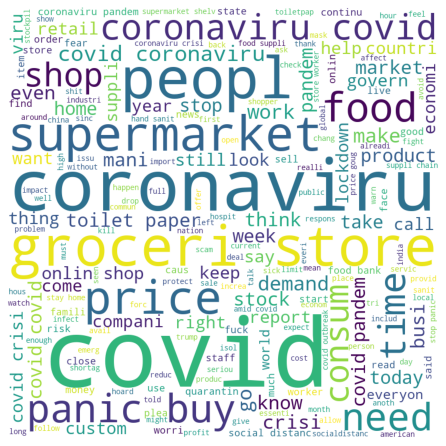

In [42]:
#word cloud for negative sentiment
words=' '.join(text for text in df_copy['OriginalTweet'][df_copy['Sentiment'] == -1])
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**Word Cloud for Neutral Sentiments word**

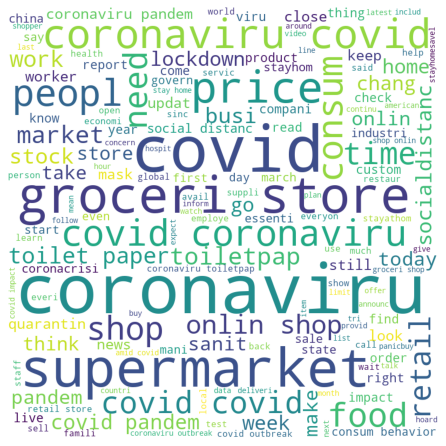

In [43]:
#word cloud for neutral sentiment
words=' '.join(text for text in df_copy['OriginalTweet'][df_copy['Sentiment'] == 0])
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**Word Cloud for Positive Sentiments word**

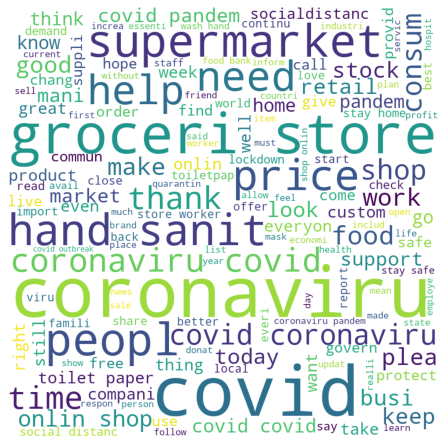

In [44]:
#word cloud for positive sentiment
words = ' '.join(text for text in df_copy['OriginalTweet'][df_copy['Sentiment'] == 1])
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **Split the data into train and test set**

In [45]:
x = df_copy['OriginalTweet']
y = df_copy['Sentiment']

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2,random_state=0,stratify = y.values)

### **Vectorization**

In [47]:
#Tf-id vecrorizer
tfid_vectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

#Apply over the data
xtrain = tfid_vectorizer.fit_transform(xtrain)
xtest = tfid_vectorizer.transform(xtest)

In [87]:
#visual of TFIDF vectorization dataframe
pd.DataFrame(
     xtrain.todense(),
     columns = tfid_vectorizer.get_feature_names()
)

,aaaaa,aaannnddd,aabutan,aacounti,aahh,aajeevika,aalto,aamen,aantal,aapi,...,zuku,zumba,zumbuehl,zumwalt,zurfi,zuschl,zusendung,zvikwereti,zweli,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
#shape of split data
print("X_train.shape : ", xtrain.shape)
print("X_test.shape : ", xtest.shape)
print("y_train.shape : ", ytrain.shape)
print("y_test.shape : ", ytest.shape)

X_train.shape :  (32925, 26851)
X_test.shape :  (8232, 26851)
y_train.shape :  (32925,)
y_test.shape :  (8232,)


---
# **Machine Learning Models (Classification)**
---
### **The prediction model should be chosen in such a way that it:**

* Is able to predict the dependent variable with high accuracy (Accuracy).
* Is easy to interpret (Interpretability)
* Is easy to explain the model (Explainability).

### **Modeling approach:**

* Use a logistic regressor model to come up with initial set of classification (baseline model)
* Calculate the model accuracy using the classification evaluation metrics.
* Then add another hyperparameter and improve the model accuracy by hyperparameter tuning.
* Find feature importances from the baseline model.
* Choose the model with the highest accuracy for deployment

### **Choice of split:**

Since the dataset used here is large with just 41157 records, and 6 features attributes, we can use cross validation rather than train-test split while tunning.

### **Evaluation metrics:**

In classification model evaluation matrics like accuracy, precision, recall, f1_ score are mostly use to find out the accuracy and error in classification, so that we will used that matrics to evaluate our model.

## **From this point on we will run different classification models with the same data.**
I will store the evaluation metrics for each model into this data frame to compare at the end.

In [49]:
#empty data frame creation
i=0
evaluation_df=pd.DataFrame()

# **1. Logistic Regression**
Logistic Regression is used to predict the categorical dependent variable using a given set of independent variables.

Now, we will fit the above processed data on various classification models.

In [50]:
#Model define
lr= LogisticRegression()

In [51]:
#hyperparameter tunning

# parameters
param = dict(penalty=['l2'],
            C=[100, 10, 1.0,0.1])

#fit above parameter in gridsearch
grid_search = GridSearchCV(estimator=lr, param_grid=param,  cv=KFold(n_splits=3), scoring='accuracy')

# fit the data to traine the model
lr_tunned = grid_search.fit(xtrain, ytrain)


In [52]:
# best parameters
lr_tunned.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [53]:
#prediction
lr_y_test_pred = lr_tunned.predict(xtest)

Evaluation

In [54]:
# clasiification result
print('Classification result \n',classification_report(ytest,lr_y_test_pred))

Classification result 
               precision    recall  f1-score   support

          -1       0.78      0.80      0.79      3080
           0       0.70      0.58      0.63      1543
           1       0.80      0.84      0.82      3609

    accuracy                           0.78      8232
   macro avg       0.76      0.74      0.75      8232
weighted avg       0.78      0.78      0.78      8232



In [55]:
# calculate the F1 score
f1score = f1_score(ytest,lr_y_test_pred,average='weighted')

#calculate the Accuracy
accuracy = accuracy_score(ytest,lr_y_test_pred)

#calculate the precision
precision = precision_score(ytest,lr_y_test_pred, average='weighted')

#calculate the recall
recall=recall_score(ytest,lr_y_test_pred, average='weighted')

print('Accuracy :' ,accuracy)
print('Precision :', precision)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.7784256559766763
Precision : 0.7753165138618189
Recall : 0.7784256559766763
F1 score : 0.7755487414169889


In [56]:
#Inserting errors in dataframe

evaluation_df.loc[i,"Model_Name"]='Logistic Regression'
evaluation_df.loc[i,"Accuracy"]=round(accuracy,2)
evaluation_df.loc[i,"Precision"]=round(precision,2)
evaluation_df.loc[i,"Recall"]=round(recall,2)
evaluation_df.loc[i,"F1 score"]=round(f1score,2)


i+=1

# **2. Ridge Classifier**
Ridge regression is a penalized linear regression model for predicting a numerical value.

Nevertheless, it can be very effective when applied to classification.

In [57]:
# define models 
Rc = RidgeClassifier()

In [58]:
#Hyperparameter Tunning

# define parameters
param =  {'alpha': [1e-5,1e-4,1e-3,1e-2,1,2,3]}

# define grid search
grid_search = GridSearchCV(estimator=Rc, param_grid=param, cv=KFold(n_splits=3), scoring='accuracy')

#fit the data to train model
Rc_tunned = grid_search.fit(xtrain, ytrain)

In [59]:
# best parameters
Rc_tunned.best_params_

{'alpha': 2}

In [60]:
#prediction
Rc_y_test_pred = Rc_tunned.predict(xtest)

Evaluation

In [61]:
# calculate the F1 score
f1score = f1_score(ytest,Rc_y_test_pred,average='weighted')

#calculate the Accuracy
accuracy = accuracy_score(ytest,Rc_y_test_pred)

#calculate the precision
precision = precision_score(ytest,Rc_y_test_pred, average='weighted')

#calculate the recall
recall=recall_score(ytest,Rc_y_test_pred, average='weighted')

print('Accuracy :' ,accuracy)
print('Precision :', precision)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.765913508260447
Precision : 0.7623964055320146
Recall : 0.765913508260447
F1 score : 0.7600150416328191


In [62]:
#Inserting errors in dataframe
evaluation_df.loc[i,"Model_Name"]='Ridge Classifier'
evaluation_df.loc[i,"Accuracy"]=round(accuracy,2)
evaluation_df.loc[i,"Precision"]=round(precision,2)
evaluation_df.loc[i,"Recall"]=round(recall,2)
evaluation_df.loc[i,"F1 score"]=round(f1score,2)
i+=1

# **3. K-Nearest Neighbors (KNN)**
k-NN is a type of classification where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification

In [63]:
#Define model
knn = KNeighborsClassifier()

In [64]:
# Hyperparameter Tunning

# parameter
param = dict(n_neighbors=range(1,3))

# tunning
grid_search = GridSearchCV(estimator=knn, param_grid=param, cv=KFold(n_splits=3), scoring='accuracy')

# fit the training data to train the model
knn_tunned = grid_search.fit(xtrain,ytrain)

In [65]:
# best parameters
knn_tunned.best_params_

{'n_neighbors': 1}

In [66]:
#prediction
knn_y_test_pred = knn_tunned.predict(xtest)


Evaluation

In [67]:
# calculate the F1 score
f1score = f1_score(ytest,knn_y_test_pred,average='weighted')

#calculate the Accuracy
accuracy = accuracy_score(ytest,knn_y_test_pred)

#calculate the precision
precision = precision_score(ytest,knn_y_test_pred, average='weighted')

#calculate the recall
recall=recall_score(ytest,knn_y_test_pred, average='weighted')

print('Accuracy :' ,accuracy)
print('Precision :', precision)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.28304178814382897
Precision : 0.6328370174311285
Recall : 0.28304178814382897
F1 score : 0.25453015318769057


In [68]:
#Inserting errors in dataframe
evaluation_df.loc[i,"Model_Name"]='K-Nearest Neighbors (KNN)'
evaluation_df.loc[i,"Accuracy"]=round(accuracy,2)
evaluation_df.loc[i,"Precision"]=round(precision,2)
evaluation_df.loc[i,"Recall"]=round(recall,2)
evaluation_df.loc[i,"F1 score"]=round(f1score,2)
i+=1

# **4. XGBoost Classifier**


In [69]:
# define model
xgb = XGBClassifier()

'''
#hyperparameter tuning
#parameters
param=dict(max_depth=[ 3, 18, 1],
           n_estimators = [10,50,100]
           )

xgb= GridSearchCV(estimator=xgb, param_grid=param)
'''

#fi the train data to train the model
xgb_tunned=xgb.fit(xtrain, ytrain)

NOTE- While doing hyperparameter tuning it takes more than 2 hr to run the code and still it is not executed, I had tried it again by reducing the hyperparameter but its still take much more time. So to show that I have understand the what exactly have to do, I have taken the tuning code as comment and moveing on in the project


In [70]:
#prediction
xgb_y_test_pred = xgb.predict(xtest)


In [71]:
# calculate the F1 score
f1score = f1_score(ytest,xgb_y_test_pred,average='weighted')

#calculate the Accuracy
accuracy = accuracy_score(ytest,xgb_y_test_pred)

#calculate the precision
precision = precision_score(ytest,xgb_y_test_pred, average='weighted')

#calculate the recall
recall=recall_score(ytest,xgb_y_test_pred, average='weighted')

print('Accuracy :' ,accuracy)
print('Precision :', precision)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.6502672497570456
Precision : 0.649345441080956
Recall : 0.6502672497570456
F1 score : 0.6380266102719103


In [72]:
#Inserting errors in dataframe
evaluation_df.loc[i,"Model_Name"]='XGBoost Classifier'
evaluation_df.loc[i,"Accuracy"]=round(accuracy,2)
evaluation_df.loc[i,"Precision"]=round(precision,2)
evaluation_df.loc[i,"Recall"]=round(recall,2)
evaluation_df.loc[i,"F1 score"]=round(f1score,2)
i+=1

# **5. Gradient Boosting Machine (GBM)**


In [73]:
#define model
GBC = GradientBoostingClassifier()

'''
#hyperparameter tuning
# define grid search
param = dict(n_estimators = [10, 100, 1000],
             learning_rate = [0.001, 0.01, 0.1],
             subsample = [0.5, 0.7, 1.0],
             max_depth = [3, 7, 9] )

#tuning
GBC = GridSearchCV(estimator=GBC, param_grid=param)
'''

#fit the train data to train the model
GBC_tunned = GBC.fit(xtrain,ytrain)

NOTE- While doing hyperparameter tuning it takes more than 2.5 hr to run the code and still it is not executed, I had tried it again by reducing the hyperparameter but its still take much more time. So to show that I have understand the what exactly have to do, I have taken the tuning code as comment and moveing on in the project. 

In [74]:
#prediction
GBC_y_test_pred = GBC_tunned.predict(xtest)


Evaluation

In [75]:
# calculate the F1 score
f1score = f1_score(ytest,GBC_y_test_pred,average='weighted')

#calculate the Accuracy
accuracy = accuracy_score(ytest,GBC_y_test_pred)

#calculate the precision
precision = precision_score(ytest,GBC_y_test_pred, average='weighted')

#calculate the recall
recall=recall_score(ytest,GBC_y_test_pred, average='weighted')

print('Accuracy :' ,accuracy)
print('Precision :', precision)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.6714042759961127
Precision : 0.6709699220470423
Recall : 0.6714042759961127
F1 score : 0.6596043704966091


In [76]:
#Inserting errors in dataframe
evaluation_df.loc[i,"Model_Name"]='Gradient Boosting Machine (GBM)'
evaluation_df.loc[i,"Accuracy"]=round(accuracy,2)
evaluation_df.loc[i,"Precision"]=round(precision,2)
evaluation_df.loc[i,"Recall"]=round(recall,2)
evaluation_df.loc[i,"F1 score"]=round(f1score,2)
i+=1

# **6. Random Forest**
Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time

In [77]:
#Define model
Rf = RandomForestClassifier() 

'''
#hyperparameter tuning
# parameters
param = {'n_estimators':[100, 200, 300],
         'max_depth':[80, 90, 100, 110] }

#tunning
Rf = GridSearchCV(Rf, param_grid = param)
'''

# Fit the object to train dataset
Rf_tunned = Rf.fit(xtrain, ytrain)

NOTE- While doing hyperparameter tuning it takes more than 1.5 hr to run the code and still it is not executed, I had tried it again by reducing the hyperparameter but its still take much more time. So to show that I have understand the what exactly have to do, I have taken the tuning code as comment and moveing on in the project. 

In [78]:
#prediction
Rf_y_test_pred = Rf_tunned.predict(xtest)


Evaluation

In [79]:
# calculate the F1 score
f1score = f1_score(ytest,Rf_y_test_pred,average='weighted')

#calculate the Accuracy
accuracy = accuracy_score(ytest,Rf_y_test_pred)

#calculate the precision
precision = precision_score(ytest,Rf_y_test_pred, average='weighted')

#calculate the recall
recall=recall_score(ytest,Rf_y_test_pred, average='weighted')

print('Accuracy :' ,accuracy)
print('Precision :', precision)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.7374878522837707
Precision : 0.7358611635889521
Recall : 0.7374878522837707
F1 score : 0.736061552028669


In [80]:
#Inserting errors in dataframe
evaluation_df.loc[i,"Model_Name"]='Random Forest Classifier'
evaluation_df.loc[i,"Accuracy"]=round(accuracy,2)
evaluation_df.loc[i,"Precision"]=round(precision,2)
evaluation_df.loc[i,"Recall"]=round(recall,2)
evaluation_df.loc[i,"F1 score"]=round(f1score,2)
i+=1

## **Modeling summary:**
* I trained 6 machine learning models using the preprocessed training dataset, and their respective performances were improved through hyperparameter tuning.

* Initially, I started with the logistic regression model, mainly because it is easily explainable to the stakeholders and it has a low training time.

* Then, I implement the Ridge classifier model and K-Nearest Neighbor(KNN) on the training data.

* To further improve the predictions of the model, I fitted 2 boosting models, namely, gradient boosting machine (GBM) and Extreme gradient boost (XG Boost). But it takes a lot of time (more than 2 hours) to implement, so I decided to run without tuning to move on in the project and the tuning code is commented. The random forect classifier exhibits similar behavior.

# **Performance Comparision**
Now I will compare the perfomance of the above trained model based on the classification evaluation metrics.

In [81]:
#sorting by F1 score
evaluation_df.sort_values(by=['F1 score'],ascending=False,inplace=True)
evaluation_df=evaluation_df.reset_index()
evaluation_df.drop(labels='index',axis=1)

,Model_Name,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.78,0.78,0.78,0.78
1,Ridge Classifier,0.77,0.76,0.77,0.76
2,Random Forest Classifier,0.74,0.74,0.74,0.74
3,Gradient Boosting Machine (GBM),0.67,0.67,0.67,0.66
4,XGBoost Classifier,0.65,0.65,0.65,0.64
5,K-Nearest Neighbors (KNN),0.28,0.63,0.28,0.25


(Text(0, 0.5, 'F1 score'), Text(0.5, 1.0, 'F1 score'))

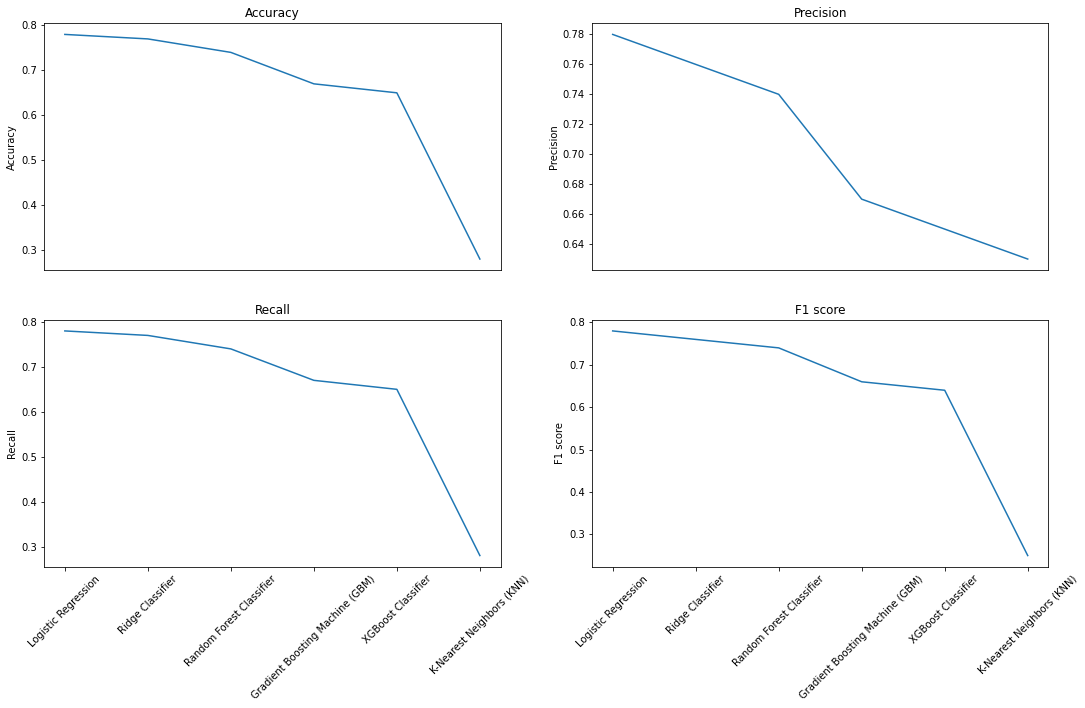

In [82]:
# Plot the above result to compare
plt.rcParams['figure.figsize'] = (18,10) 

plt.figure()
plt.subplot(2,2,1)                                                      # here e have used subplot to plot in paralle, subplot(nrow,ncolumn,nindex)
plt.xticks(rotation=45)
plt.plot(evaluation_df['Model_Name'],evaluation_df['Accuracy'])
plt.ylabel('Accuracy') ,plt.title('Accuracy')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)                                        # to remove the notation on x axis


plt.subplot(2,2,2)
plt.xticks(rotation=45)
plt.plot(evaluation_df['Model_Name'],evaluation_df['Precision'])
plt.ylabel('Precision') , plt.title('Precision')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)

plt.subplot(2,2,3)
plt.xticks(rotation=45)
plt.plot(evaluation_df['Model_Name'],evaluation_df['Recall'])
plt.ylabel('Recall'), plt.title('Recall')

plt.subplot(2,2,4)
plt.xticks(rotation=45)
plt.plot(evaluation_df['Model_Name'],evaluation_df['F1 score'])
plt.ylabel('F1 score'), plt.title('F1 score')

**Final choice of model depends on:**

It is necessary to have a model with the highest accuracy and lowest error, as well as less complexibility and enough explainability, and thus the classification must be explained to stakeholders.

---
# **Conclusion**
---



* K-Nearest Neighbors (KNN) doesn't work well with a large dataset and with a high number of dimensions. It didn't classify the sentiments efficiently and ended up affecting the evaluation metrics and giving worse results than all the other implemented models.

* The Ridge classifier decreases the complexity of a model, and in the Random Forest classifier, the large number of trees makes the algorithm too slow. Both these models gave a moderate result of about 0.76 and 0.74 F1-score, respectively. The Gradient Boosting classifier (GBM) and XGBoost classifier gave almost identical results of 0.66 and 0.64 F1-score, respectively.

* Logistic regression gives the highest result of about 0.78 F1-score of all the implemented models, so I can use the logistic regression model for further classification.

* As I have seen above, while selecting a model, it should have good explainability and less complexibility. As per the result, I  have all three models with higher accuracy and less error, which is good explainable so that our final model can be the logistic regression.